#  2 recommender systems in python

## Correlation based system

### imports

In [135]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import warnings
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings('ignore')

### Loading data

In [3]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Merging 2 dataframes into new one

In [6]:
df = pd.merge(movies,ratings, on='movieId')

In [7]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [8]:
df.tail()

,movieId,title,genres,userId,rating,timestamp
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148
105338,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),475,4.0,1451223429


In [9]:
df.shape

(105339, 6)

In [10]:
df['movieId'].nunique()

10325

### Getting the years of the movies

In [11]:
years = []

for title in df['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
        
df['moviePubYear'] = years
print(len(df[df['moviePubYear'] == 9999]))

2


In [12]:
df.head()

,movieId,title,genres,userId,rating,timestamp,moviePubYear
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286,1995


### Function that plots a histogram

In [13]:
def histogram(df, bins, column, title, xlabel, ylabel):
    if column == 'moviePubYear':
        df = df[df['moviePubYear'] != 9999]
        
    fig,ax = plt.subplots()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlabel, fontsize=16, labelpad=20)
    ax.set_ylabel(ylabel, fontsize=16, labelpad=20)
    
    # 10 bins for rating and 25 for year
    plt.hist(df[column], bins=bins, color='royalblue', linewidth=2)

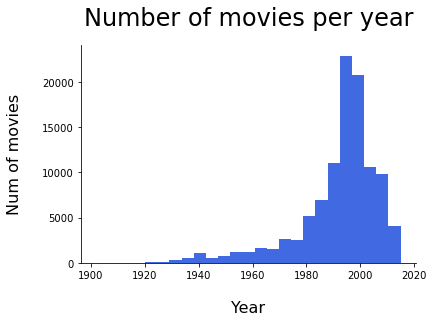

In [14]:
histogram(df,25, 'moviePubYear', 'Number of movies per year', 'Year', 'Num of movies')

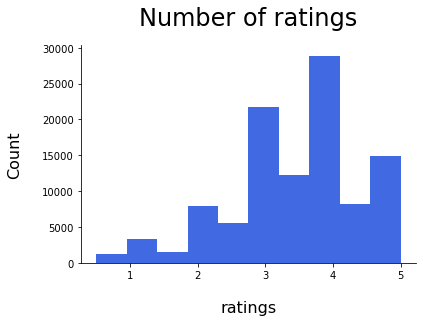

In [15]:
histogram(df,10, 'rating', 'Number of ratings', 'ratings', 'Count')

### Creating new dataframe of Genres

In [16]:
genre_df = pd.DataFrame(df['genres'].str.split('|').tolist(), index=df['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

In [17]:
genre_df.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


### Function that plots a bar graph

In [18]:
def bar_plot(df, column, sort_index=False):
    if sort_index == False:
        xs = df[column].value_counts().index
        ys = df[column].value_counts().values
    else:
        xs = df[column].value_counts().sort_index().index
        ys = df[column].value_counts().sort_index().values
        
    fig,ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('Most popular movie genres', fontsize=24, pad=20)
    ax.set_xlabel('Genre', fontsize=16, labelpad=20)
    ax.set_ylabel('Count', fontsize=16, labelpad=20)
    plt.xticks(rotation=45)
    
    plt.bar(x=xs, height=ys, color='royalblue', linewidth=2)

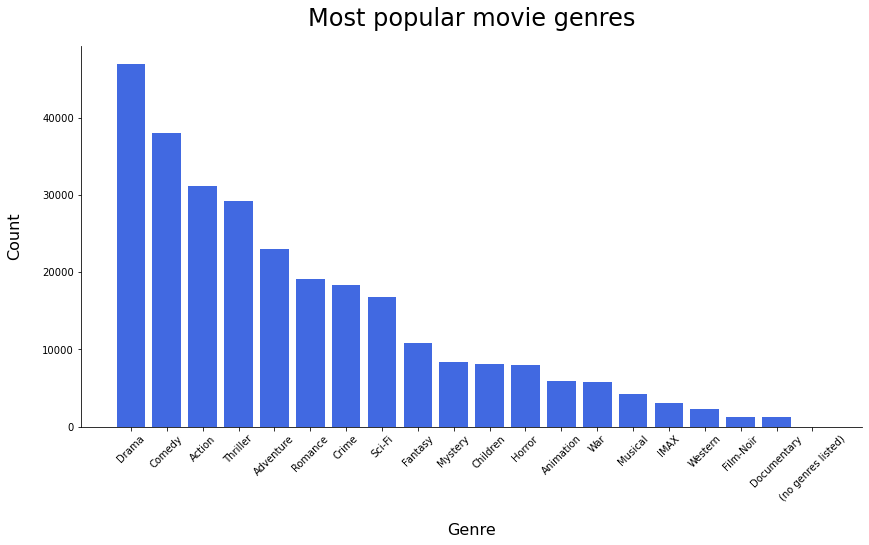

In [19]:
bar_plot(genre_df, 'Genre')

### Getting the mean rating for each genre

In [20]:
values = defaultdict(list)
for ind, row in df.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['rating'])
        
        
genre_lst, rating_lst = [], []
for key, item in values.items():
    if key not in [0, 1]:
        genre_lst.append(key)
        rating_lst.append(np.mean(item))
        
        
genres_with_ratings = pd.DataFrame([genre_lst, rating_lst]).T
genres_with_ratings.columns = ['Genre', 'Mean_Rating']

In [21]:
genres_with_ratings.head()

,Genre,Mean_Rating
0,Adventure,3.51803
1,Animation,3.63535
2,Children,3.43943
3,Comedy,3.421
4,Fantasy,3.50046


### Getting the total number of ratings for each movie

In [22]:
num_ratings = pd.DataFrame(df.groupby('movieId').count()['rating']).reset_index()
df = pd.merge(left=df, right=num_ratings, on='movieId')
df.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [23]:
df.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:10]

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
8815,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,223,5.0,948941040,1994,325
11163,356,Forrest Gump (1994),Comedy|Drama|Romance|War,196,5.0,834707483,1994,311
9624,318,"Shawshank Redemption, The (1994)",Crime|Drama,70,5.0,1252701714,1994,308
14740,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,431,4.0,839893514,1993,294
18515,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,318,3.0,842517264,1991,290
7582,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,50,3.0,905249982,1977,273
53498,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,277,4.0,1445249840,1999,261
17810,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,278,4.0,1341360389,1991,253
3958,110,Braveheart (1995),Action|Drama|War,451,4.0,1130836510,1995,248
15875,527,Schindler's List (1993),Drama|War,7,2.5,1322058520,1993,248


### Plotting scatter graph of the relationship between Rating and number of ratings

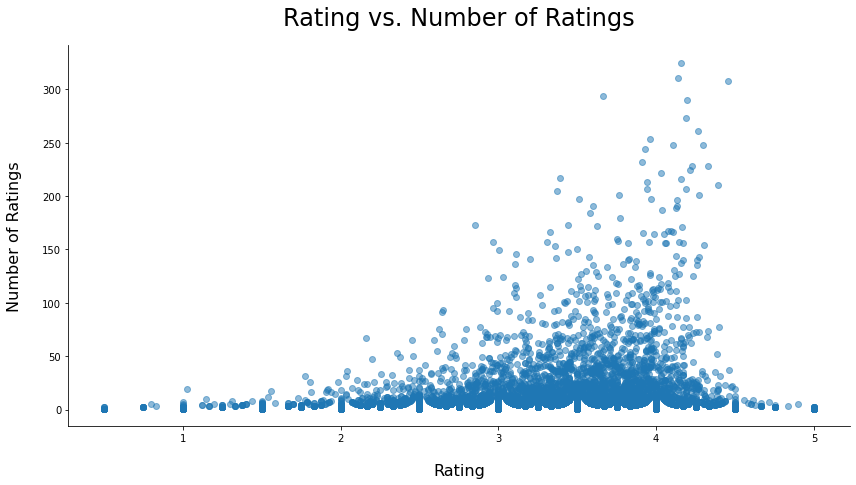

In [24]:
ratings_df = pd.DataFrame()
ratings_df['Mean_Rating'] = df.groupby('title')['rating'].mean().values
ratings_df['Num_Ratings'] = df.groupby('title')['rating'].count().values


fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5)

### Making the matrix(userID by Movies)

In [25]:
matrix = df.pivot_table(
    index='userId',
    columns='title',
    values='rating'
)

In [26]:
matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see is full of NaN values (because the users dont rate multiple movies)

### The recommender function that calculates the correlation between movies and print the top 5

In [57]:
def recommender(movie_title, n_ratings_filter=80, n_recommendations=5):
    similar = matrix.corrwith(matrix[movie_title])
    corr_similar = pd.DataFrame(similar, columns=['correlation'])
    corr_similar.dropna(inplace=True)
    
    orig = df.copy()
    
    corr_with_movie = pd.merge(
        left=corr_similar, 
        right=orig, 
        on='title')[['title', 'correlation', 'numRatings']].drop_duplicates().reset_index(drop=True)
    
    result = corr_with_movie[corr_with_movie['numRatings'] > n_ratings_filter].sort_values(by='correlation', ascending=False)
    
    return result.head(n_recommendations)

### Now let's test it!

In [58]:
recommender('Pulp Fiction (1994)')

,title,correlation,numRatings
3846,Pulp Fiction (1994),1.000000,325
510,Being John Malkovich (1999),0.542833,124
2628,Kill Bill: Vol. 2 (2004),0.530735,91
3985,Reservoir Dogs (1992),0.472520,131
849,Casino (1995),0.444799,84


In [59]:
recommender('Forrest Gump (1994)')

,title,correlation,numRatings
1773,Forrest Gump (1994),1.000000,311
345,As Good as It Gets (1997),0.521448,98
3295,Mr. Holland's Opus (1995),0.500052,91
4353,"Shawshank Redemption, The (1994)",0.471145,308
1909,Ghost (1990),0.462485,142


In [60]:
recommender('Reservoir Dogs (1992)')

,title,correlation,numRatings
3502,Reservoir Dogs (1992),1.000000,131
3112,One Flew Over the Cuckoo's Nest (1975),0.546813,143
1757,Goodfellas (1990),0.521212,135
4340,Trainspotting (1996),0.507353,114
755,Casino (1995),0.502558,84


In [61]:
recommender('Minority Report (2002)')

,title,correlation,numRatings
2699,Minority Report (2002),1.000000,108
3591,Sense and Sensibility (1995),0.606676,100
3254,Psycho (1960),0.584988,86
832,Cliffhanger (1993),0.520355,114
4159,Toy Story 2 (1999),0.515564,104


In [62]:
recommender('Mission: Impossible (1996)')

,title,correlation,numRatings
2973,Mission: Impossible (1996),1.000000,173
595,"Blues Brothers, The (1980)",0.571011,99
2613,Liar Liar (1997),0.563736,81
686,Broken Arrow (1996),0.556995,109
2956,Minority Report (2002),0.507303,108


In [63]:
recommender('Toy Story 2 (1999)')

,title,correlation,numRatings
4252,Toy Story 2 (1999),1.000000,104
4251,Toy Story (1995),0.709677,232
664,"Bug's Life, A (1998)",0.625637,102
2068,"Incredibles, The (2004)",0.618350,102
320,Babe (1995),0.598465,129


In [233]:
recommender('Shrek (2001)')

,title,correlation,numRatings
4115,Shrek (2001),1.000000,158
305,Armageddon (1998),0.555461,100
2749,"Lord of the Rings: The Fellowship of the Ring,...",0.513340,189
3300,Ocean's Eleven (2001),0.503195,119
4067,Shakespeare in Love (1998),0.502855,106


### We can see is not perfect, as it makes some clear mistakes,mixing genres, so let's try a different approach:

## K Nearest Neighbor system

### Using only the movies with more than 100 reviews

In [195]:
knn_df = df[df['numRatings'] > 100]

In [206]:
knn_df.shape

(22556, 8)

In [207]:
df.shape

(105339, 8)

### Matrix Manipulation

In [198]:
# Creating the matrix
knn_matrix_df = knn_df.pivot_table(
    index='title',
    columns='userId',
    values='rating'
)

In [199]:
# Substituting NaN values for 0
knn_matrix_df.fillna(0.00, inplace=True)

In [200]:
#Doing the calculation on a scipy matrix, for more precise results
knn_matrix = csr_matrix(knn_matrix_df.values)

### Making the model

In [201]:
#training the model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(knn_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Recommender Function:

In [234]:
def KNN_recommender(name):
    distances, indices = model.kneighbors(knn_matrix_df.loc[name, :].values.reshape(1, -1), n_neighbors=6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for: {0}'.format(name))
        else:
            print('{0}: {1}, with distance {2}'.format(i, knn_matrix_df.index[indices.flatten()[i]], distances.flatten()[i]))
        

### Now let's test it and compare with the results of the other method!

In [223]:
KNN_recommender('Pulp Fiction (1994)')

Recommendations for: Pulp Fiction (1994)
1: Silence of the Lambs, The (1991), with distance 0.27649543004099775
2: Shawshank Redemption, The (1994), with distance 0.2970643525971439
3: Usual Suspects, The (1995), with distance 0.3194265780569018
4: Forrest Gump (1994), with distance 0.3414128118021953
5: Seven (a.k.a. Se7en) (1995), with distance 0.3434726907977461


In [224]:
KNN_recommender('Forrest Gump (1994)')

Recommendations for: Forrest Gump (1994)
1: Jurassic Park (1993), with distance 0.276093004942656
2: Pulp Fiction (1994), with distance 0.3414128118021953
3: Braveheart (1995), with distance 0.35022072691457207
4: Shawshank Redemption, The (1994), with distance 0.3620962794831538
5: Apollo 13 (1995), with distance 0.3681420579041663


In [225]:
KNN_recommender('Reservoir Dogs (1992)')

Recommendations for: Reservoir Dogs (1992)
1: Goodfellas (1990), with distance 0.38680774749358626
2: Full Metal Jacket (1987), with distance 0.4002868659849629
3: Pulp Fiction (1994), with distance 0.4232843969922404
4: Trainspotting (1996), with distance 0.42706616362824057
5: Usual Suspects, The (1995), with distance 0.4449866684501582


In [226]:
KNN_recommender('Minority Report (2002)')

Recommendations for: Minority Report (2002)
1: Spider-Man (2002), with distance 0.3935474198469935
2: Ocean's Eleven (2001), with distance 0.4168825173341312
3: Lord of the Rings: The Fellowship of the Ring, The (2001), with distance 0.4225921118729009
4: Gladiator (2000), with distance 0.4248947439419537
5: Bourne Identity, The (2002), with distance 0.42759675990233503


In [227]:
KNN_recommender('Mission: Impossible (1996)')

Recommendations for: Mission: Impossible (1996)
1: Independence Day (a.k.a. ID4) (1996), with distance 0.31899314189950256
2: Rock, The (1996), with distance 0.3405311181083097
3: Twister (1996), with distance 0.36988602056865916
4: Star Wars: Episode VI - Return of the Jedi (1983), with distance 0.4352157767163827
5: Toy Story (1995), with distance 0.4399011198150946


In [228]:
KNN_recommender('Toy Story 2 (1999)')

Recommendations for: Toy Story 2 (1999)
1: Bug's Life, A (1998), with distance 0.42817227855339557
2: Shrek (2001), with distance 0.44208686179921886
3: Toy Story (1995), with distance 0.44247707404956405
4: Sixth Sense, The (1999), with distance 0.4699681131581702
5: Monsters, Inc. (2001), with distance 0.4733721713370306


In [230]:
KNN_recommender('Shrek (2001)')

Recommendations for: Shrek (2001)
1: Monsters, Inc. (2001), with distance 0.32258544024829516
2: Lord of the Rings: The Fellowship of the Ring, The (2001), with distance 0.35085350264565807
3: Lord of the Rings: The Two Towers, The (2002), with distance 0.4089021317304583
4: Ocean's Eleven (2001), with distance 0.4150158146965607
5: Finding Nemo (2003), with distance 0.4206139995740198
